# 使用CNN卷积神经网络模型

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
# 载入MNIST数据集
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# 将样本从整数转换为浮点数
x_train, x_test = x_train / 255.0, x_test / 255.0

# 转换为3通道的图像
x_train = np.stack((x_train, x_train, x_train), axis=3)
x_test = np.stack((x_test, x_test, x_test), axis=3)


# 使用tf.keras.Sequential来构建模型
# 使用卷积神经网络
model = models.Sequential()
# 卷积池化层
model.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# 卷积池化层
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
# 全连接层
model.add(layers.Dense(128, activation='softmax'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # 交叉熵损失函数
              metrics=['accuracy'])


# 训练并验证模型
model.fit(x_train, y_train, epochs=10)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1818 - accuracy: 0.8295
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3990 - accuracy: 0.8885
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2545 - accuracy: 0.8942
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2109 - accuracy: 0.8972
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1885 - accuracy: 0.9025
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0980 - accuracy: 0.9820
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0490 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0396 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0349 - accuracy: 0.9915
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.031

# 准确率

In [2]:
print('\nTest accuracy:', test_acc) # 输出准确率


Test accuracy: 0.9908000230789185


# 随机选择25张测试图片，绘制预测结果

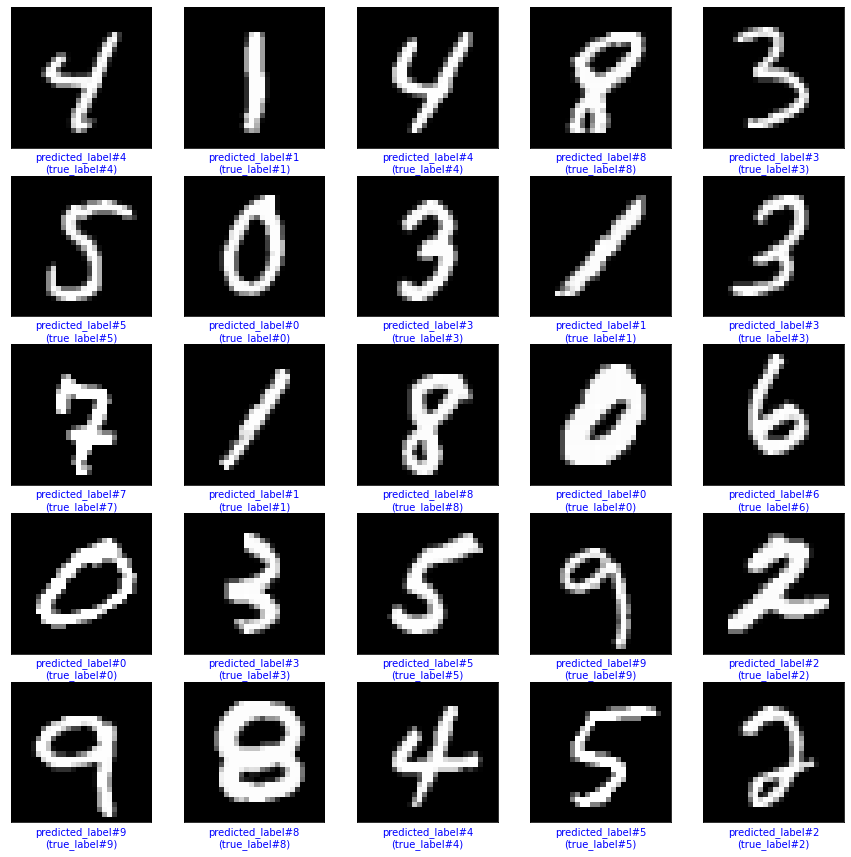

In [3]:
# 绘制一张图片
def plot_image(predicted_label, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    # 对于预测正确的，使用蓝色标识
    # 对于预测错误的，使用红色标识
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("predicted_label#{}\n(true_label#{})".format(predicted_label, true_label), color=color)

    
plt.figure(figsize=(15, 15))
# 随机选择25张测试图片，绘制预测结果
for i in range(25):
    random = np.random.randint(len(y_test) + 1) # 生成随机数
    img = x_test[random] # 随机选择一张图片
    predicted_label = np.argmax(model.predict(np.expand_dims(img, 0))) # 模型预测
    true_label = y_test[random]
    plt.subplot(5, 5, i+1)
    plot_image(predicted_label, true_label, img) # 绘制一张图片
plt.show()